In [1]:
import os
import sys

In [2]:
# os.chdir("C:/Users/Alphonse/Documents/Master_2/Stage/Random_forest/Group_variable_selection_with_RFGV")
os.getcwd()
sys.path.append("./CARTGV")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from CARTGV import CARTGVTree, CARTGVTreeBuilder
from CARTGV import CARTGVSplitter, BaseDenseCARTGVSplitter, BestCARTGVSplitter
from CARTGV import CARTGVCriterion, CARTGVClassificationCriterion, CARTGVGini

from sklearn.utils.validation import check_random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

run __init__.py


# Data

In [4]:
#Import of the data
df = pd.read_csv('CARTGV/data_Mael.csv', sep=";", index_col=0)

# Select only the train samples
train = df.loc[df['Type'] == 'train']

# Remove the first two columns of teh dataframe
X = train.iloc[:, 2:]

# Select the responses for the train samples
y = train['Y']

# Select the index of each column for each group
g1_idx = [col for col in range(len(X.columns)) if '_G1' in X.columns[col]]
g2_idx = [col for col in range(len(X.columns)) if '_G2' in X.columns[col]]
g3_idx = [col for col in range(len(X.columns)) if '_G3' in X.columns[col]]
g4_idx = [col for col in range(len(X.columns)) if '_G4' in X.columns[col]]
g5_idx = [col for col in range(len(X.columns)) if '_G5' in X.columns[col]]

# Represent the groups as an array containing the index of the group column/variable inside the dataframe
groups = np.array([g1_idx, g2_idx, g3_idx, g4_idx, g5_idx])

# Parameters

In [5]:
sample_size = 334
Xs = X.head(sample_size).to_numpy(dtype=np.float32)
ys = y.head(sample_size).to_numpy(dtype=np.intp)

len_groups = np.array([len(group) for group in groups])

ys = np.atleast_1d(ys)
min_samples_leaf = 1 # The minimum number of samples in a leaf
min_samples_split = 2 # The minimum number of samples needed to split the node
min_weight_leaf = 0 # The minimum weight in a leaf
random_state = check_random_state(2547) # The seed
max_depth = 10 # The maximal depth for the splitting_tree
max_depth_splitting_tree = 2
mgroup = 5 # The number of group to visit
mvar = 5 # The number of variable to visit
min_impurity_decrease = 0.0 # The minimum decrease in impurity that we want to achieve after a split
min_impurity_split = 0.0 # The minimum impurity under which the node is considered a leaf
min_impurity_decrease_splitting_tree = 0.0
min_impurity_split_splitting_tree = 0.0


if ys.ndim == 1:
    ys = np.reshape(ys, (-1, 1))

n_outputs = ys.shape[1] # The number of outputs

ys = np.copy(ys)

classes = [] # The different classes
n_classes = [] # The number of classes

ys_encoded = np.zeros(ys.shape, dtype=int)
for k in range(n_outputs):
    classes_k, ys_encoded[:, k] = np.unique(ys[:, k], return_inverse=True)
    classes.append(classes_k)
    n_classes.append(classes_k.shape[0])

ys = ys_encoded

n_classes = np.array(n_classes, dtype=np.intp)

# Objects construction

In [7]:
# The criterion that will compute the impurities
criterion = CARTGVGini(n_outputs, n_classes) 

# The splitter that will split each node
splitter = BestCARTGVSplitter(criterion, len(groups),
                          min_samples_leaf, min_weight_leaf,
                          random_state, max_depth_splitting_tree, 
                          min_impurity_decrease_splitting_tree,
                          min_impurity_split_splitting_tree,
                          mvar,
                          mgroup
                        )

# The tree that will be completed by the end of the algorithm 
tree = CARTGVTree(len(groups), len_groups, n_classes, n_outputs)

# The Builder that will fill the tree during the process
builder = CARTGVTreeBuilder(splitter, min_samples_split,
                            min_samples_leaf, min_weight_leaf,
                            max_depth, min_impurity_decrease, min_impurity_split)

# Launch tree construction

In [9]:
builder.build(tree, Xs, ys, 
              groups, len_groups, pen = None, sample_weight = None) #.to_numpy(dtype=np.float32)
# The pen parameter can take the value : "root", "size", "log", None, 
# or a lambda function with only one argument for the group size
#If the data doesn't come from a pandas Dataframe remove the to_numpy

## GROUP 0 ##
## GROUP 1 ##
## GROUP 2 ##
## GROUP 3 ##
## GROUP 4 ##
Impurity Node : 0.49955179461436405
## GROUP 0 ##
## GROUP 1 ##
## GROUP 2 ##
## GROUP 3 ##
## GROUP 4 ##
Impurity Node : 0.375
Impurity Node : 0.0
Impurity Node : 0.0
## GROUP 0 ##
## GROUP 1 ##
## GROUP 2 ##
## GROUP 3 ##
## GROUP 4 ##
Impurity Node : 0.2703086419753087
## GROUP 0 ##
## GROUP 1 ##
## GROUP 2 ##
## GROUP 3 ##
## GROUP 4 ##
Impurity Node : 0.38293444328824144
## GROUP 0 ##
## GROUP 1 ##
## GROUP 2 ##
## GROUP 3 ##
## GROUP 4 ##
Impurity Node : 0.09499999999999997
Impurity Node : 0.0
Impurity Node : 0.0
Impurity Node : 0.0
Impurity Node : 0.0
## GROUP 0 ##
## GROUP 1 ##
## GROUP 2 ##
## GROUP 3 ##
## GROUP 4 ##
Impurity Node : 0.31999999999999995
Impurity Node : 0.0
Impurity Node : 0.0
Impurity Node : 0.0
Impurity Node : 0.0
## GROUP 0 ##
## GROUP 1 ##
## GROUP 2 ##
## GROUP 3 ##
## GROUP 4 ##
Impurity Node : 0.1788642422413359
## GROUP 0 ##
## GROUP 1 ##
## GROUP 2 ##
## GROUP 3 ##
## GROUP 4 ##
Impu

# Results and visualisation

## Parents
Each number represent the parent of the node with the id the index of the array.
The parent -2 represent the root

In [10]:
print(tree.nodes_parent)

[-2.  0.  1.  1.  0.  4.  5.  6.  6.  6.  5.  5. 11. 11.  5.  4.  4. 16.
 17. 17. 17. 17. 16. 22. 23. 23. 23. 23. 27. 27. 22. 30. 30. 30. 22. 22.
 16. 36. 36. 36. 16.  4. 41. 41.  0. 44. 45. 45. 45. 44. 49. 49. 49. 52.
 52. 44. 55. 55. 44. 58. 58. 58.  0. 62. 62. 64. 64. 62. 67. 67. 62.]


## Impurities
Each value is the value of the node with the id the index of the array

In [11]:
print(tree.nodes_impurities)

[0.49955179 0.375      0.         0.         0.27030864 0.38293444
 0.095      0.         0.         0.         0.         0.32
 0.         0.         0.         0.         0.17886424 0.375
 0.         0.         0.         0.         0.09972299 0.1748179
 0.         0.         0.         0.375      0.         0.
 0.02631111 0.         0.         0.         0.         0.
 0.46875    0.         0.         0.         0.         0.375
 0.         0.         0.34407151 0.40816327 0.         0.
 0.         0.10226443 0.         0.         0.44444444 0.
 0.         0.27777778 0.         0.         0.4260355  0.
 0.         0.         0.07881404 0.         0.375      0.
 0.         0.44444444 0.         0.         0.        ]


## Number of samples in each node

In [12]:
print(tree.nodes_n_node_samples)
print('\n')
print(tree.nodes_weighted_n_node_samples)

[334.   4.   3.   1. 180.  31.  20.  16.   1.   3.   1.   5.   1.   4.
   5.   4. 141.  12.   8.   1.   2.   1. 114.  31.   2.   4.  21.   4.
   1.   3.  75.  13.   1.  61.   2.   6.   8.   3.   3.   2.   7.   4.
   3.   1.  77.  21.  13.   6.   2.  37.  31.   3.   3.   1.   2.   6.
   1.   5.  13.   8.   1.   4.  73.  61.   4.   3.   1.   3.   2.   1.
   5.]


[334.   4.   3.   1. 180.  31.  20.  16.   1.   3.   1.   5.   1.   4.
   5.   4. 141.  12.   8.   1.   2.   1. 114.  31.   2.   4.  21.   4.
   1.   3.  75.  13.   1.  61.   2.   6.   8.   3.   3.   2.   7.   4.
   3.   1.  77.  21.  13.   6.   2.  37.  31.   3.   3.   1.   2.   6.
   1.   5.  13.   8.   1.   4.  73.  61.   4.   3.   1.   3.   2.   1.
   5.]


## Groups
Represent the group that splited the node.
A value of -1 means the node is a leaf and wasn't splitted.

In [13]:
print(tree.nodes_group)

[ 1.  0. -1. -1.  0.  2.  0. -1. -1. -1. -1.  0. -1. -1. -1. -1.  3.  0.
 -1. -1. -1. -1.  0.  2. -1. -1. -1.  0. -1. -1.  0. -1. -1. -1. -1. -1.
  0. -1. -1. -1. -1.  0. -1. -1.  4.  1. -1. -1. -1.  1. -1. -1.  0. -1.
 -1.  0. -1. -1.  0. -1. -1. -1.  0. -1.  0. -1. -1.  0. -1. -1. -1.]


## Number of childs

In [14]:
print(tree.nodes_n_childs)

[4. 2. 0. 0. 4. 4. 3. 0. 0. 0. 0. 2. 0. 0. 0. 0. 4. 4. 0. 0. 0. 0. 4. 4.
 0. 0. 0. 2. 0. 0. 3. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 2. 0. 0. 4. 3. 0. 0.
 0. 3. 0. 0. 2. 0. 0. 2. 0. 0. 3. 0. 0. 0. 4. 0. 2. 0. 0. 2. 0. 0. 0.]


## Number of nodes in the CARTGVTree

In [15]:
print(tree.node_count)

71


## Splitting trees
In order of split

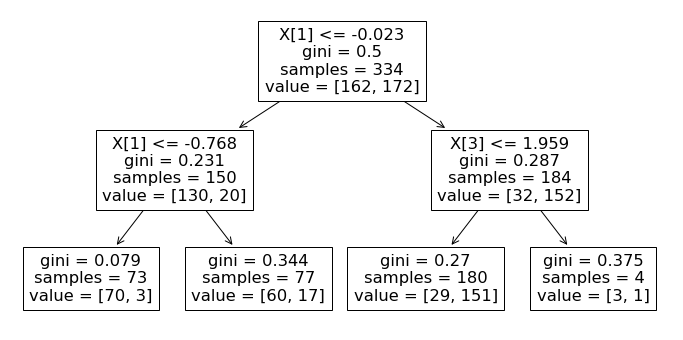

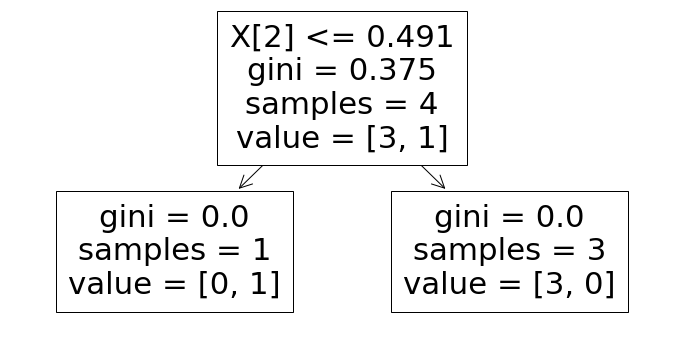

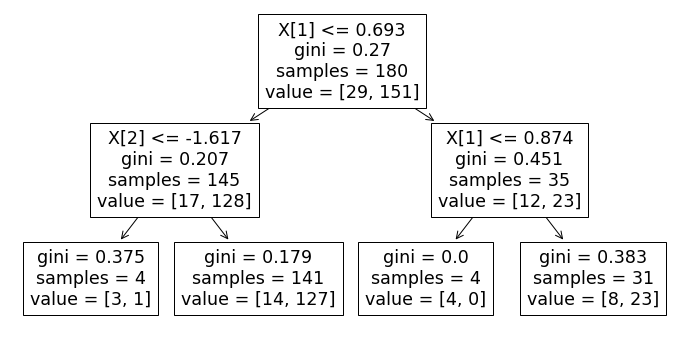

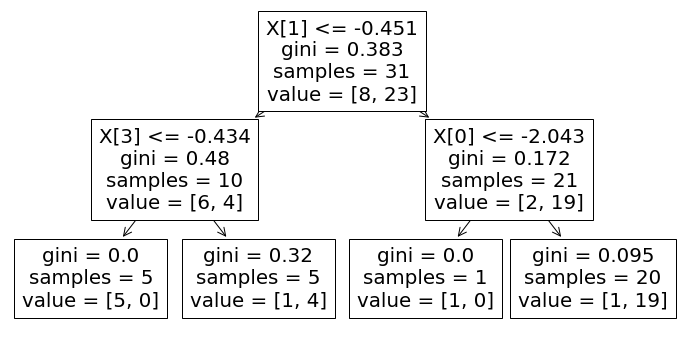

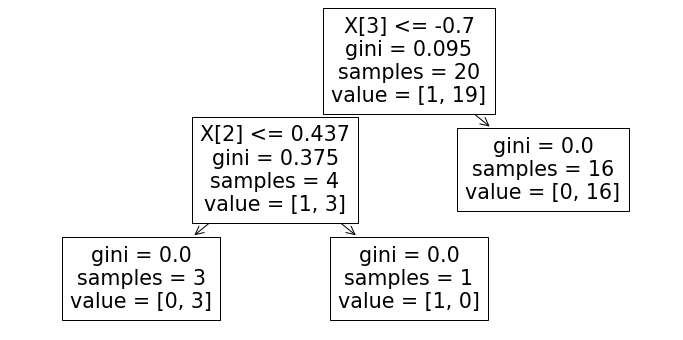

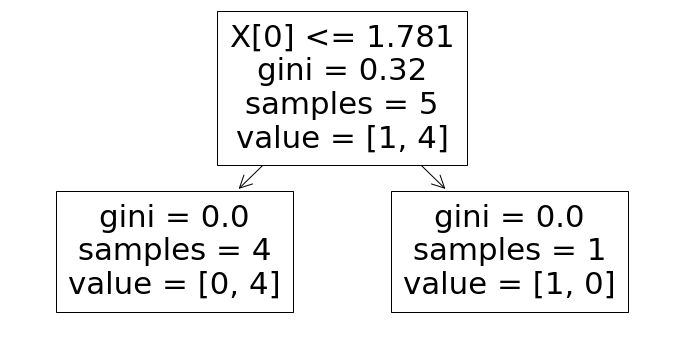

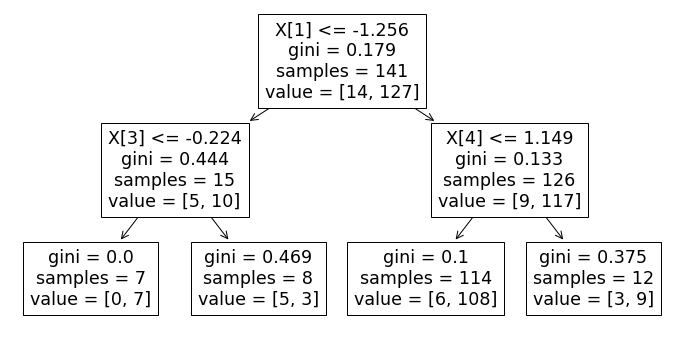

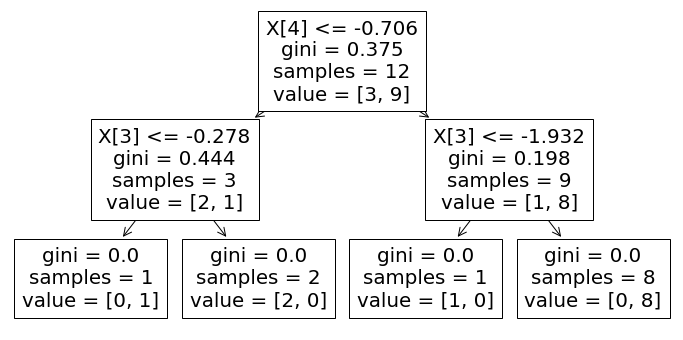

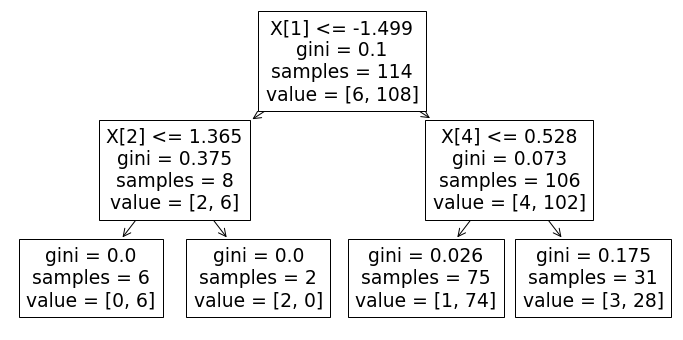

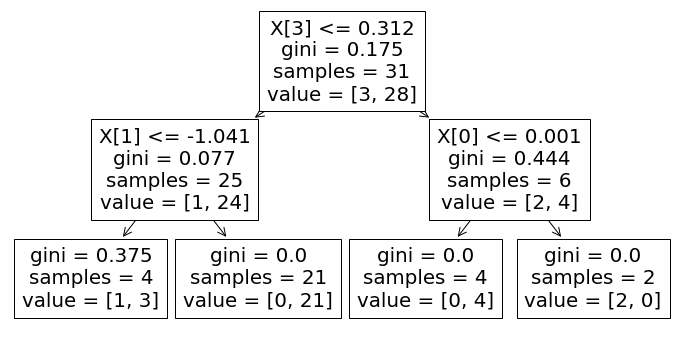

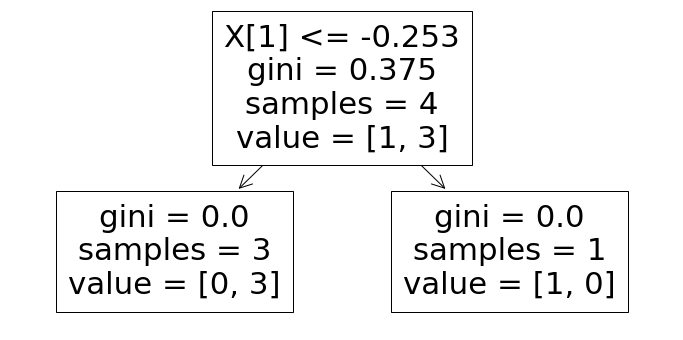

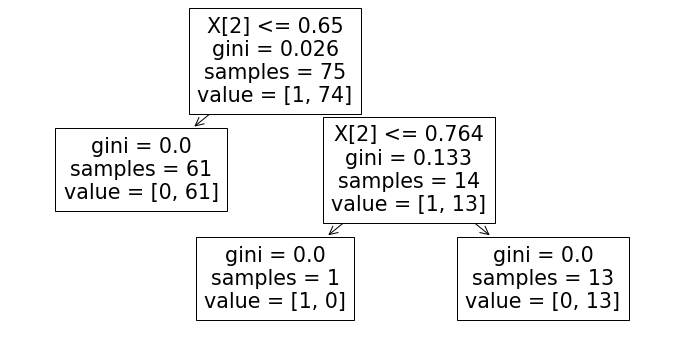

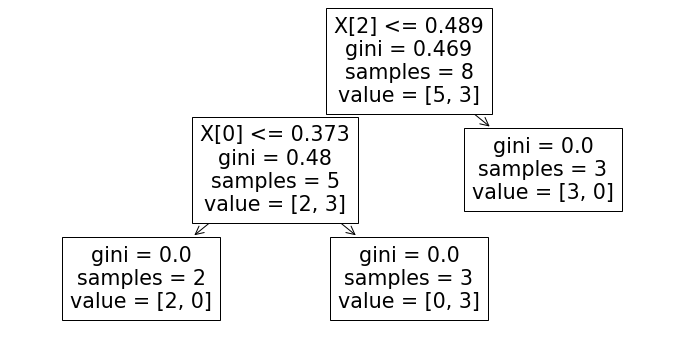

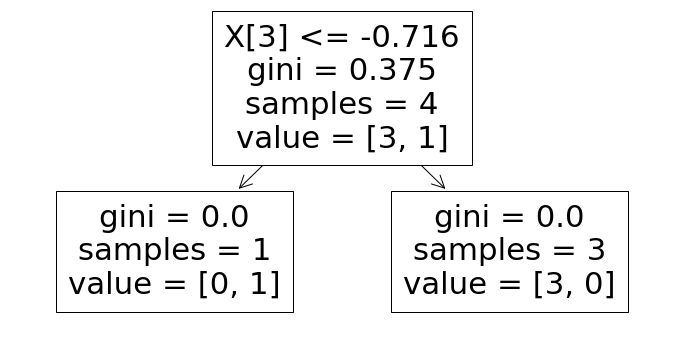

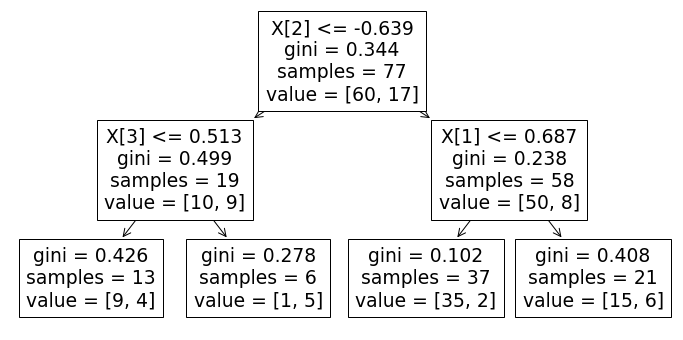

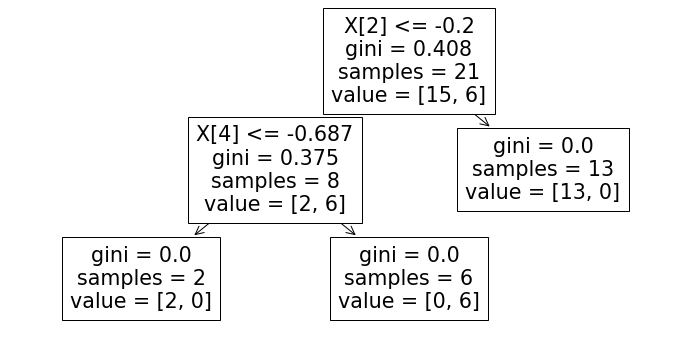

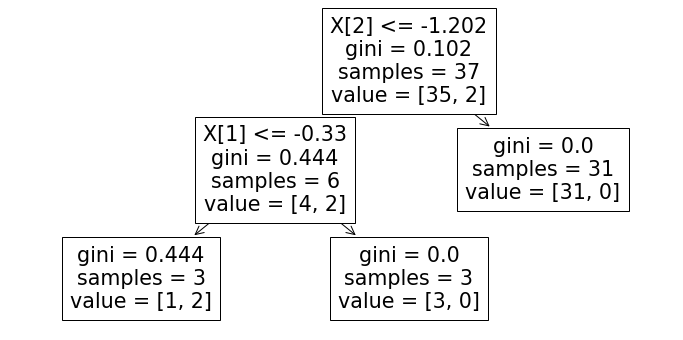

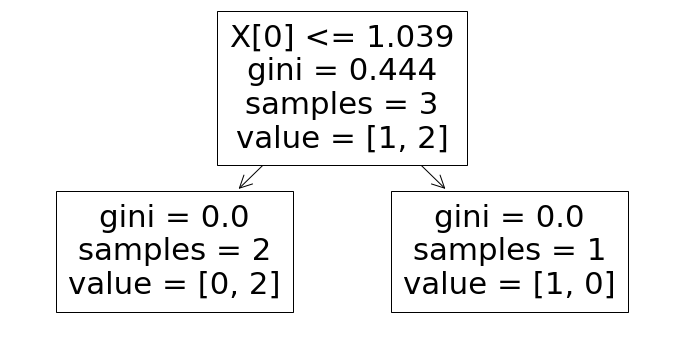

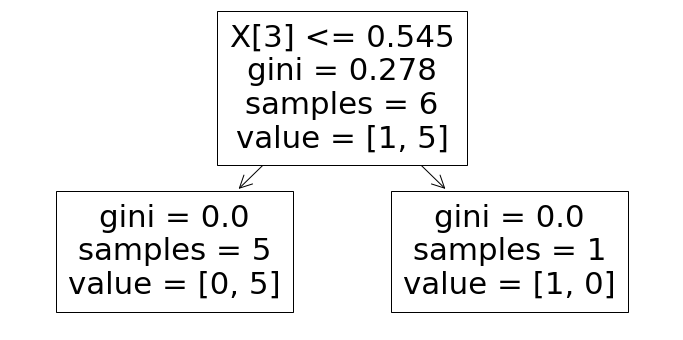

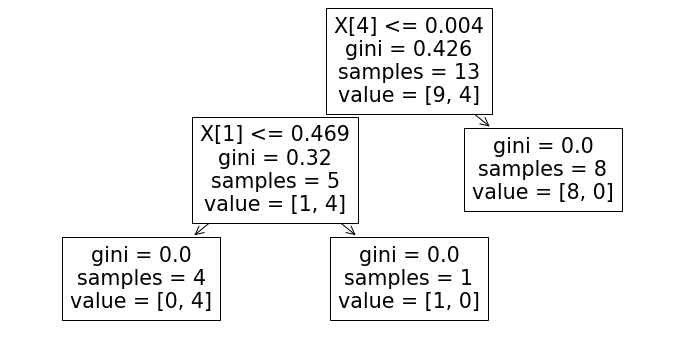

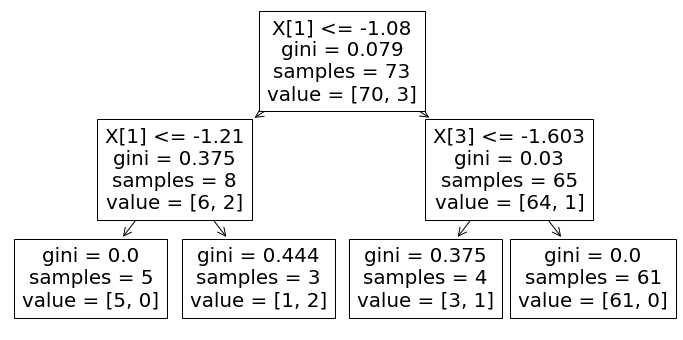

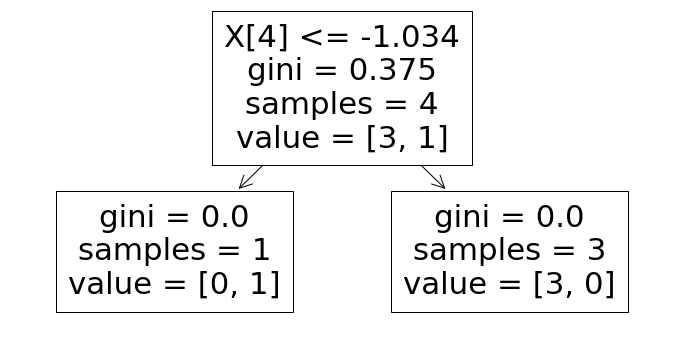

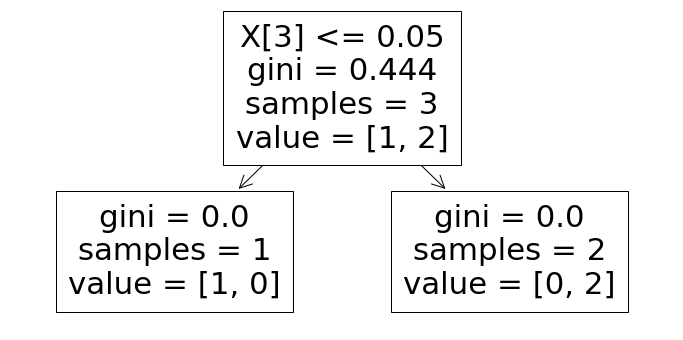

In [16]:
clf = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state, max_features=len(groups[0]),
                             max_leaf_nodes=X.shape[0])

for i in range(tree.node_count):
    clf.tree_ = tree.nodes_splitting_trees[i]
    if(tree.nodes_splitting_trees[i] != None):
        fig, ax = plt.subplots(1, figsize=(12, 6))
        plot_tree(clf)
        plt.show()